In [138]:
import requests
from bs4 import BeautifulSoup
import csv
r=requests.get('https://movie.douban.com/top250')
mypage= r.text

page_next=[]
url = 'https://movie.douban.com/top250'
for q in [-25,0,25,50,75,100,125,150,175,200,225]:
    page_number=str(q + 25)
    url_next=url+ "?start=" + page_number + '&filter='
    page_next.append(url_next)

cn_name = []
en_name = []
comment_number = []
rating = []

data = []

actors = []
year = []
area= []
types = []
genre = []
location = []
director  = []

for page in page_next:
    l1 = requests.get(page).text
    mypage = BeautifulSoup(l1,'html.parser')
    mylis = mypage.find('ol', attrs={'class': 'grid_view'}).find_all('li')

    for li in mylis:
        myspans = li.find('div', attrs={'class': 'hd'}).find_all('span')
        cn_name.append(myspans[0].text)
        en_name.append(myspans[1].text[3:])
        comment_number.append(li.find('div', attrs={'class': 'star'}).find_all('span')[3].text[:-3])
        rating.append(li.find('span', attrs={'class': 'rating_num'}).text)
        directors = li.find('p').text.strip()
        
        staff = directors.replace(u'\xa0', u' ')
        idx_director = staff.find('导演:')
        idx_actors = staff.find('主')
        if len(staff[idx_director:idx_actors]) < 61:
            director.append(staff[idx_director:idx_actors])
        else:
            director.append(staff[idx_director:62])
        parts = staff.split('/')
        year.append(parts[-3].split()[-1])
        area.append(parts[-2])
        types.append(parts[-1])


with open('doubanmovie.csv','w') as f:
     writers = csv.writer(f)
     header = ['cn_name','alias','rating' , 'comment_number' , 'director','year','area','types']
     writers.writerow(header)
     writers.writerows(zip(cn_name,en_name,rating,comment_number,director,year,area,types))


In [139]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [140]:
df = pd.read_csv('doubanmovie.csv')
df

,cn_name,alias,rating,comment_number,director,year,area,types
0,肖申克的救赎,The Shawshank Redemption,9.6,1010557,导演: 弗兰克·德拉邦特 Frank Darabont,1994,美国,犯罪 剧情
1,霸王别姬,再见，我的妾 / Farewell My Concubine,9.5,734877,导演: 陈凯歌 Kaige Chen,1993,中国大陆 香港,剧情 爱情 同性
2,这个杀手不太冷,Léon,9.4,949127,导演: 吕克·贝松 Luc Besson,1994,法国,剧情 动作 犯罪
3,阿甘正传,Forrest Gump,9.4,807123,导演: Robert Zemeckis,1994,美国,剧情 爱情
4,美丽人生,La vita è bella,9.5,471331,导演: 罗伯托·贝尼尼 Roberto Benigni,1997,意大利,剧情 喜剧 爱情 战争
5,千与千寻,千と千尋の神隠し,9.2,755401,导演: 宫崎骏 Hayao Miyazaki,2001,日本,剧情 动画 奇幻
6,泰坦尼克号,Titanic,9.2,746773,导演: 詹姆斯·卡梅隆 James Cameron,1997,美国,剧情 爱情 灾难
7,辛德勒的名单,Schindler's List,9.4,429297,导演: 史蒂文·斯皮尔伯格 Steven Spielberg,1993,美国,剧情 历史 战争
8,盗梦空间,Inception,9.3,847164,导演: 克里斯托弗·诺兰 Christopher Nolan,2010,美国 英国,剧情 科幻 悬疑 冒险
9,机器人总动员,WALL·E,9.3,555558,导演: 安德鲁·斯坦顿 Andrew Stanton,2008,美国,爱情 科幻 动画 冒险


In [148]:
df['types'].describe()

count     250
unique    133
top        剧情
freq       20
Name: types, dtype: object

In [149]:
df['year'].describe()

count      250
unique      54
top       2004
freq        13
Name: year, dtype: object

In [141]:
df['area'].describe()

count      250
unique      65
top        美国 
freq        85
Name: area, dtype: object

In [142]:
df['area'].value_counts()

 美国                   85
 日本                   30
 香港                   13
 美国 英国                10
 韩国                    9
 美国 德国                 7
 中国大陆 香港               6
 美国 加拿大                5
 中国大陆                  5
 印度                    4
 英国                    4
 美国 法国                 4
 英国 美国                 4
 香港 中国大陆               4
 美国 澳大利亚               3
 意大利 美国                2
 美国 德国 英国              2
 台湾 美国                 2
 德国                    2
 法国                    2
 意大利                   2
 美国 新西兰                2
 德国 美国                 1
 英国 澳大利亚 美国            1
 台湾                    1
 香港 台湾                 1
 美国 德国 捷克              1
 法国 德国 意大利 西班牙 瑞士      1
 法国 英国 美国              1
 法国 美国                 1
                      ..
 英国 德国 法国              1
 香港 日本 韩国              1
 台湾 法国                 1
 新西兰 美国                1
 台湾 日本                 1
 美国 英国 加拿大 冰岛          1
 法国 英国                 1
 法国 瑞士 德国              1
 法国 瑞士 西班牙 美国 阿联酋      1


In [143]:
area_counts = df['area'].value_counts()
area_counts

 美国                   85
 日本                   30
 香港                   13
 美国 英国                10
 韩国                    9
 美国 德国                 7
 中国大陆 香港               6
 美国 加拿大                5
 中国大陆                  5
 印度                    4
 英国                    4
 美国 法国                 4
 英国 美国                 4
 香港 中国大陆               4
 美国 澳大利亚               3
 意大利 美国                2
 美国 德国 英国              2
 台湾 美国                 2
 德国                    2
 法国                    2
 意大利                   2
 美国 新西兰                2
 德国 美国                 1
 英国 澳大利亚 美国            1
 台湾                    1
 香港 台湾                 1
 美国 德国 捷克              1
 法国 德国 意大利 西班牙 瑞士      1
 法国 英国 美国              1
 法国 美国                 1
                      ..
 英国 德国 法国              1
 香港 日本 韩国              1
 台湾 法国                 1
 新西兰 美国                1
 台湾 日本                 1
 美国 英国 加拿大 冰岛          1
 法国 英国                 1
 法国 瑞士 德国              1
 法国 瑞士 西班牙 美国 阿联酋      1


In [144]:
rating_top50 = df.sort_values(by='rating', ascending=False).head(50)

In [145]:
rating_top50['area'].describe

<bound method NDFrame.describe of 0                     美国 
41                    美国 
4                    意大利 
1                中国大陆 香港 
2                     法国 
7                     美国 
26                    美国 
3                     美国 
44                    美国 
8                  美国 英国 
9                     美国 
18                    韩国 
34                    美国 
29                  中国大陆 
62                    伊朗 
211                   美国 
198                   日本 
79                  中国大陆 
20                    美国 
11                    印度 
12                 美国 英国 
5                     日本 
6                     美国 
10                   意大利 
17                    美国 
19          美国 英国 加拿大 冰岛 
13              法国 瑞士 德国 
14               香港 中国大陆 
101                   美国 
122                   日本 
214     法国 德国 意大利 西班牙 瑞士 
221           意大利 西班牙 西德 
60                    韩国 
55                意大利 美国 
54                    印度 
48                    美国 
46                    韩国 
39  

<Container object of 65 artists>

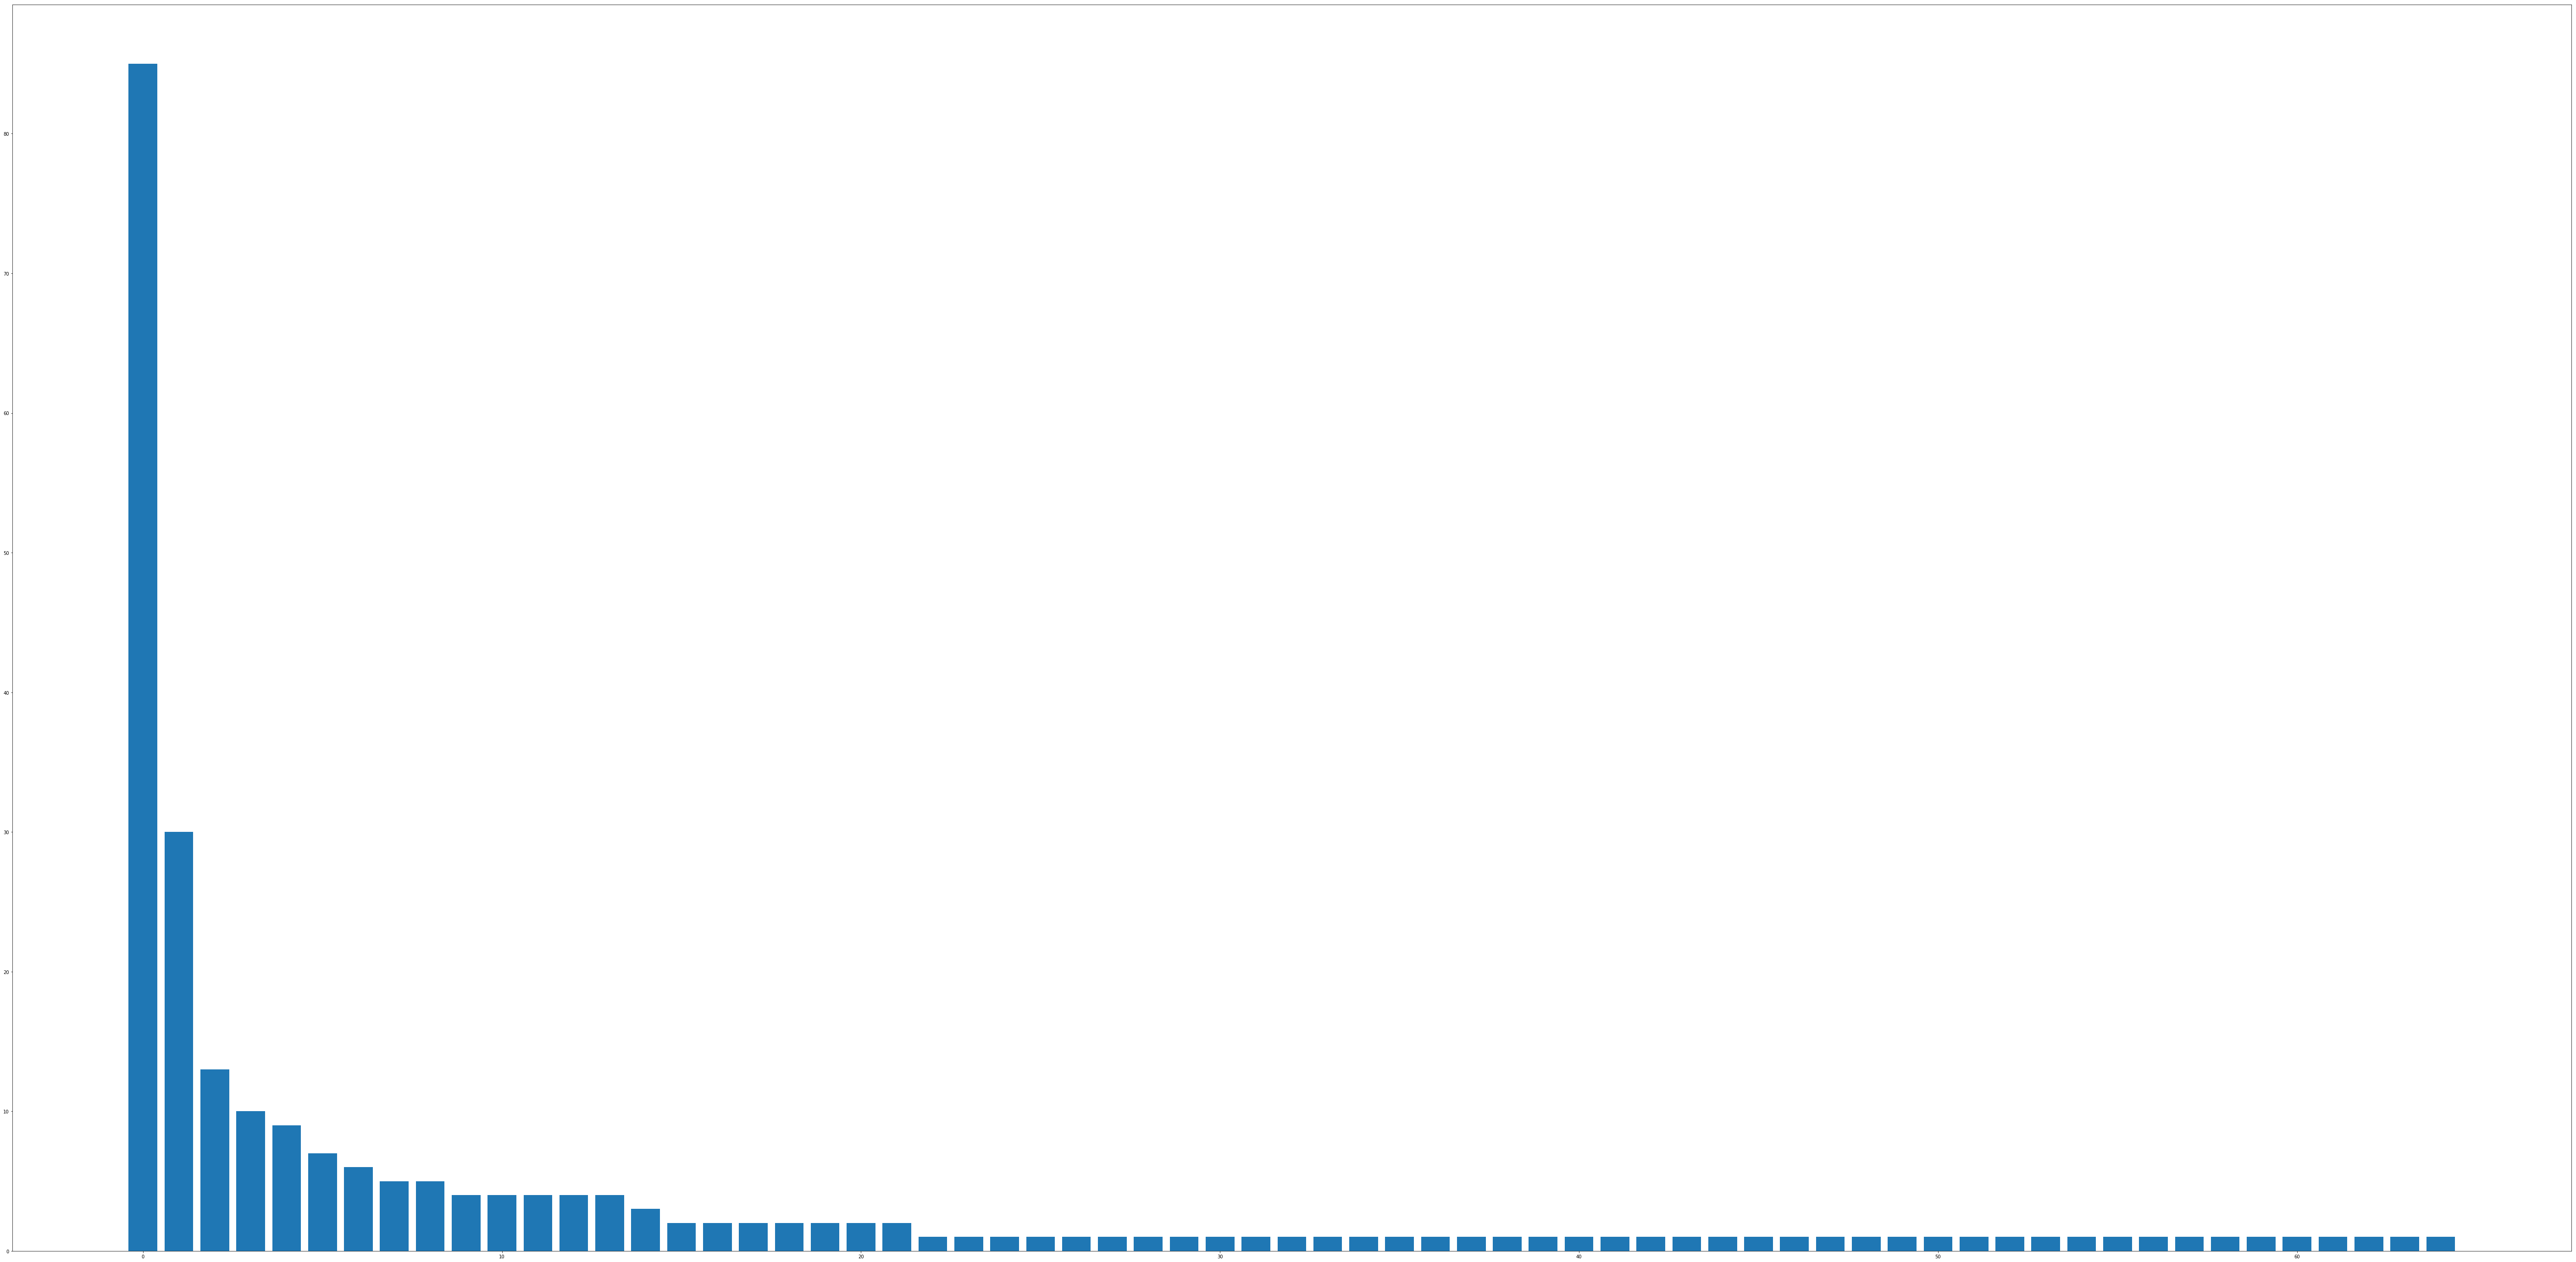

In [152]:
fig = plt.figure(figsize = (100,50))
plt.bar(range(len(area_counts)), area_counts.values)

<Container object of 250 artists>

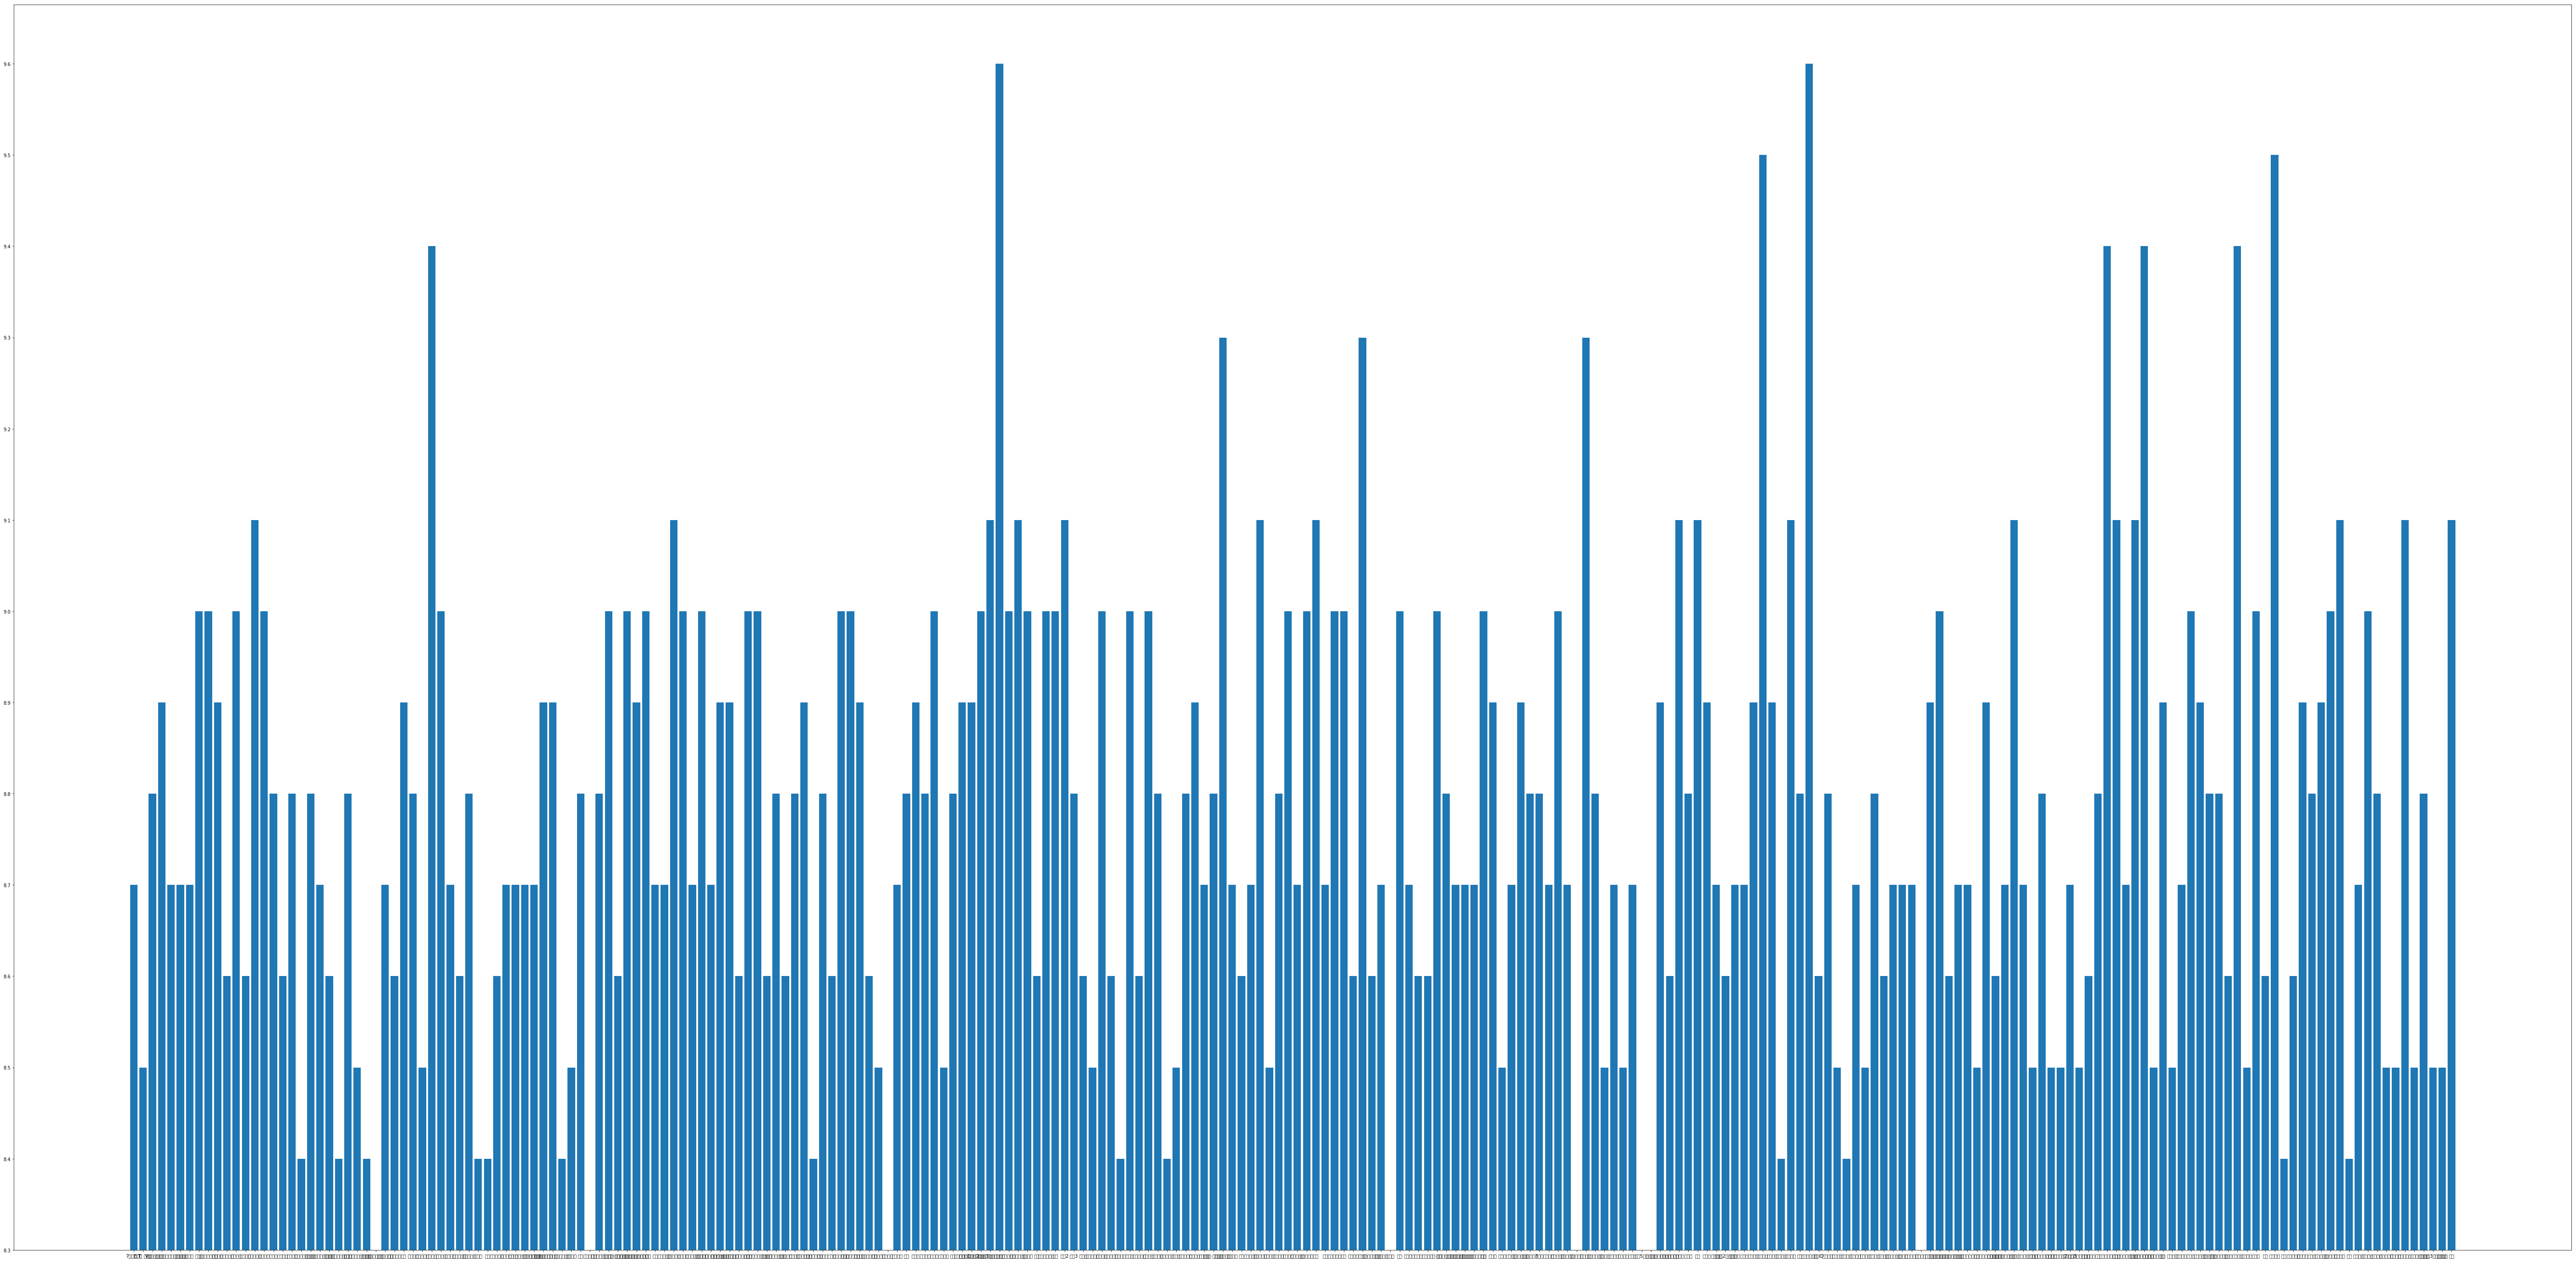

In [150]:
fig = plt.figure(figsize = (100,50))
plt.bar(cn_name,rating)

In [154]:
df['rating'].mean()

8.788

In [158]:
dfmean= df.sort_values(by='year', ascending=False)

In [159]:
dfmean[dfmean['rating'] > 8.788].sort_values(by='year', ascending=True)

,cn_name,alias,rating,comment_number,director,year,area,types
211,城市之光,City Lights,9.2,45948,导演: Charles Chaplin,1931,美国,喜剧 剧情 爱情
101,摩登时代,Modern Times,9.2,96793,导演: 查理·卓别林 Charles Chaplin,1936,美国,喜剧 剧情 爱情
20,乱世佳人,Gone with the Wind,9.2,297388,导演: 维克多·弗莱明 Victor Fleming / 乔治·库克 George Cuko...,1939,美国,剧情 历史 爱情 战争
151,魂断蓝桥,Waterloo Bridge,8.8,134833,导演: Mervyn LeRoy,1940,美国,剧情 战争 爱情
157,雨中曲,Singin' in the Rain,9.0,96900,导演: Stanley Donen / Gene Kelly,1952,美国,喜剧 歌舞 爱情
198,东京物语,東京物語,9.2,52853,导演: 小津安二郎 Yasujirô Ozu,1953,日本,剧情 家庭
35,罗马假日,Roman Holiday,8.9,423228,导演: 威廉·惠勒 William Wyler,1953,美国,喜剧 剧情 爱情
122,七武士,七人の侍,9.2,81586,导演: 黑泽明 Akira Kurosawa,1954,日本,动作 冒险 剧情
26,十二怒汉,12 Angry Men,9.4,189456,导演: Sidney Lumet,1957,美国,剧情
41,控方证人,Witness for the Prosecution,9.6,109470,导演: 比利·怀尔德 Billy Wilder,1957,美国,剧情 犯罪 悬疑


In [167]:
director_top10 = dfmean['director'].value_counts().head(10)

In [168]:
director_top10

导演: 克里斯托弗·诺兰 Christopher Nolan             7
导演: 宫崎骏 Hayao Miyazaki                     7
导演: 史蒂文·斯皮尔伯格 Steven Spielberg             5
导演: 王家卫 Kar Wai Wong                       5
导演: 李安 Ang Lee                             4
导演: 大卫·芬奇 David Fincher                    4
导演: 刘镇伟 Jeffrey Lau                        3
导演: 弗朗西斯·福特·科波拉 Francis Ford Coppola       3
导演: 理查德·柯蒂斯 Richard Curtis                 3
导演: 理查德·林克莱特 Richard Linklater             3
Name: director, dtype: int64

In [171]:
def is_select(x):
    return x.find('韩国') != -1 
df1 = df[df['area'].apply(is_select)]
df1

,cn_name,alias,rating,comment_number,director,year,area,types
18,熔炉,도가니,9.2,305740,导演: 黄东赫 Dong-hyuk Hwang,2011,韩国,剧情
46,辩护人,변호인,9.1,234671,导演: 杨宇硕 Woo-seok Yang,2013,韩国,剧情
60,素媛,소원,9.1,203348,导演: 李濬益 Jun-ik Lee,2013,韩国,剧情
78,春光乍泄,春光乍洩,8.8,267823,导演: 王家卫 Kar Wai Wong,1997,香港 日本 韩国,剧情 爱情 同性
98,阳光姐妹淘,써니,8.8,287480,导演: 姜炯哲 Hyeong-Cheol Kang,2011,韩国,剧情 喜剧
112,恐怖直播,더 테러 라이브,8.7,239304,导演: 金秉祐 Byeong-woo Kim,2013,韩国,剧情 犯罪 悬疑
123,杀人回忆,살인의 추억,8.7,221036,导演: 奉俊昊 Joon-ho Bong,2003,韩国,犯罪 剧情 悬疑 惊悚
143,7号房的礼物,7번방의 선물,8.7,187277,导演: 李焕庆 Hwan-kyeong Lee,2013,韩国,剧情 喜剧 家庭
242,我爱你,그대를 사랑합니다,9.0,59289,导演: 秋昌民 Chang-min Choo,2011,韩国,剧情 爱情
245,爱·回家,집으로...,9.0,48503,导演: 李廷香 Jeong-hyang Lee,2002,韩国,剧情 家庭


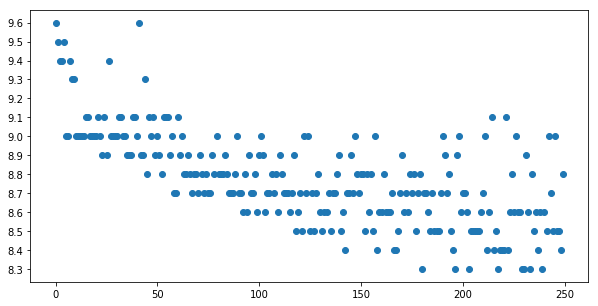

In [183]:
fig = plt.figure(figsize = (10,5))
plt.scatter(range(len(year)),rating)

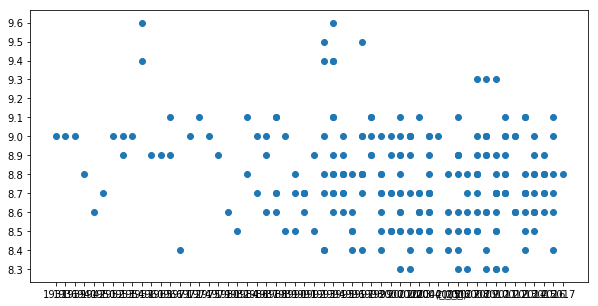

In [188]:
fig = plt.figure(figsize = (10,5))
plt.scatter(year,rating)